## Observations and Insights 

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np
from scipy.stats import sem
from scipy.stats import linregress

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
mouse_df = pd.merge(mouse_metadata,study_results,on="Mouse ID",how="outer")
# Display the data table for preview
mouse_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [2]:
# Checking the number of mice.

len(mouse_df["Mouse ID"].unique())

249

In [3]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 

mouse_df.loc[mouse_df[["Mouse ID","Timepoint"]].duplicated(keep=False),:]

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
909,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
911,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,51.745156,0
913,g989,Propriva,Female,21,26,10,49.880528,0
914,g989,Propriva,Female,21,26,15,51.325852,1
915,g989,Propriva,Female,21,26,15,53.442020,0
916,g989,Propriva,Female,21,26,20,55.326122,1
917,g989,Propriva,Female,21,26,20,54.657650,1


In [4]:
# Optional: Get all the data for the duplicate mouse ID.
mouse_df.loc[(mouse_df["Mouse ID"] == "g989"),:]

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
909,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
911,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,51.745156,0
913,g989,Propriva,Female,21,26,10,49.880528,0
914,g989,Propriva,Female,21,26,15,51.325852,1
915,g989,Propriva,Female,21,26,15,53.442020,0
916,g989,Propriva,Female,21,26,20,55.326122,1
917,g989,Propriva,Female,21,26,20,54.657650,1


In [5]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
# mouse_df.set_index("Mouse ID")
mouse_cleaned_df = mouse_df.loc[(mouse_df["Mouse ID"] != "g989"),:]
mouse_cleaned_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [6]:
# Checking the number of mice in the clean DataFrame.
len(mouse_cleaned_df["Mouse ID"].unique())

248

## Summary Statistics

In [7]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume 
#for each regimen

# Create tumor volume series
tv = mouse_cleaned_df["Tumor Volume (mm3)"]

tv_mean = np.mean(tv)
tv_median = np.median(tv)
tv_var = np.var(tv,ddof=0)
tv_sd = np.std(tv,ddof=0)
tv_sem = sem(tv)

tumor_summ_df = pd.DataFrame({
    "Tumor Volume Stats":["Mean", "Median", "Variance", "Std Dev", "SEM"],
    "Value":[tv_mean,tv_median,tv_var,tv_sd,tv_sem]})
print("-----ALL DRUG REGIMES TUMOR VOLUME SUMMARY STATISTICS----")
print(tumor_summ_df)
print("---------------------------------\n")

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary dataframe.
drug_and_vol = mouse_cleaned_df[["Drug Regimen","Tumor Volume (mm3)"]]
drug_and_vol
group_by_regimen_df = drug_and_vol.groupby(["Drug Regimen"])
summary_df =pd.DataFrame({})
summary_df["Mean"] = group_by_regimen_df["Tumor Volume (mm3)"].mean()
summary_df["Median"] = group_by_regimen_df["Tumor Volume (mm3)"].median()
summary_df["Variance"]=group_by_regimen_df["Tumor Volume (mm3)"].var()
summary_df["Std Dev"]=group_by_regimen_df["Tumor Volume (mm3)"].std()
summary_df["SEM"]=group_by_regimen_df["Tumor Volume (mm3)"].sem()
print("-----TUMOR SUMMARY STATISTICS BY DRUG REGIMEN----")
summary_df

-----ALL DRUG REGIMES TUMOR VOLUME SUMMARY STATISTICS----
  Tumor Volume Stats      Value
0               Mean  50.435293
1             Median  48.933454
2           Variance  79.420640
3            Std Dev   8.911826
4                SEM   0.205591
---------------------------------

-----TUMOR SUMMARY STATISTICS BY DRUG REGIMEN----


,Mean,Median,Variance,Std Dev,SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [19]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Using the aggregation method, produce the same summary statistics in a single line

mouse_cleaned_df.groupby("Drug Regimen").agg({'Tumor Volume (mm3)':['mean','median','var','std','sem']}).rename(columns={'mean':'Mean','median':'Median','var':'Variance','std':'Std Dev','sem':'SEM'})


Tumor Volume (mm3)                                          
                           Mean     Median   Variance   Std Dev       SEM
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Propriva              52.320930  50.446266  43.852013  6.622085  0.544332
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398

## Bar and Pie Charts

<AxesSubplot:title={'center':'Drug Regimen'}>

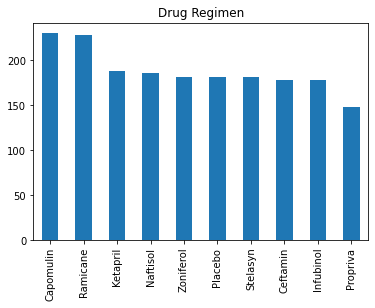

In [20]:
# Generate a bar plot showing the total number of measurements taken on each drug regimen using pandas.
measure_by_regimen_df = mouse_cleaned_df["Drug Regimen"].value_counts()
measure_by_regimen_df.plot(kind="bar", title = "Drug Regimen",ylabel="")

Text(0.5, 1.0, 'Drug Regimen')

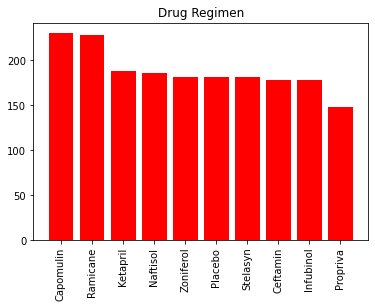

In [21]:
# Generate a bar plot showing the total number of measurements taken on each drug regimen using pyplot.

x_axis = measure_by_regimen_df.keys()
y_axis = measure_by_regimen_df.tolist()
plt.xticks(rotation=90)
plt.bar(x_axis,y_axis,color="red")
plt.title("Drug Regimen")

<AxesSubplot:title={'center':'Distribution of female versus male mice'}>

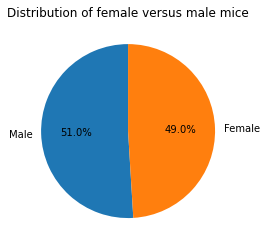

In [22]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
mouse_sex_df = mouse_cleaned_df["Sex"].value_counts()
mouse_sex_df.plot(kind="pie",title="Distribution of female versus male mice",autopct="%1.1f%%",ylabel="",startangle=90)

Text(0.5, 1.0, 'Distribution of female versus male mice')

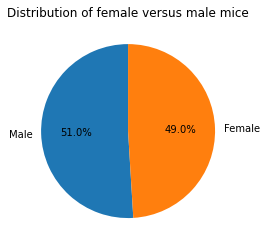

In [23]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
sex_labels = mouse_sex_df.keys()

plt.pie(mouse_sex_df,labels=sex_labels,autopct="%1.1f%%",startangle=90)
plt.title("Distribution of female versus male mice")

## Quartiles, Outliers and Boxplots

In [24]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse
grouped_by_mouse = mouse_cleaned_df.groupby(["Mouse ID"])
lgst_tp = grouped_by_mouse["Timepoint"].max()

# Merge this group df with the original dataframe to get the tumor volume at the last timepoint
treatment_df = pd.merge(lgst_tp,mouse_cleaned_df,on=["Mouse ID","Timepoint"],how="left")
treatment_df

,Mouse ID,Timepoint,Drug Regimen,Sex,Age_months,Weight (g),Tumor Volume (mm3),Metastatic Sites
0,a203,45,Infubinol,Female,20,23,67.973419,2
1,a251,45,Infubinol,Female,21,25,65.525743,1
2,a262,45,Placebo,Female,17,29,70.717621,4
3,a275,45,Ceftamin,Female,20,28,62.999356,3
4,a366,30,Stelasyn,Female,16,29,63.440686,1
...,...,...,...,...,...,...,...,...
243,z435,10,Propriva,Female,12,26,48.710661,0
244,z578,45,Ramicane,Male,11,16,30.638696,0
245,z581,45,Infubinol,Female,24,25,62.754451,3
246,z795,45,Naftisol,Female,13,29,65.741070,3


In [48]:
# Put treatments into a list for for loop (and later for plot labels)
treatments = ["Capomulin", "Ramicane", "Infubinol","Ceftamin"]

# Create empty list to fill with tumor vol data (for plotting). Note: I rather do dictionaries.
tumor_vol_data = {}
outliers = {}


for treatment in treatments:
# Locate the rows which contain mice on each drug and get the tumor volumes
    tumor_vol_data[treatment] = treatment_df.loc[(treatment_df["Drug Regimen"]==treatment),:]["Tumor Volume (mm3)"]
# Calculate the IQR and quantitatively determine if there are any potential outliers. 
    quartiles = tumor_vol_data[treatment].quantile([.25,.5,.75])
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    iqr = upperq-lowerq
    lower_bound = lowerq - (1.5*iqr)
    upper_bound = upperq + (1.5*iqr)
    print(f"{treatment} IQR is {round(iqr,2)}. Any number lower than {round(lower_bound,2)} and greater than {round(upper_bound,2)} is a potential outlier")
# Determine outliers using upper and lower bounds
    for outlier in tumor_vol_data[treatment]:
        if outlier < lower_bound or outlier > upper_bound:
            outliers[treatment] = outlier
            print(f"Potential outlier(s) = {treatment}: {round(outlier,2)}")
    


Capomulin IQR is 7.78. Any number lower than 20.7 and greater than 51.83 is a potential outlier
Ramicane IQR is 9.1. Any number lower than 17.91 and greater than 54.31 is a potential outlier
Infubinol IQR is 11.48. Any number lower than 36.83 and greater than 82.74 is a potential outlier
Potential outlier(s) = Infubinol: 36.32
Ceftamin IQR is 15.58. Any number lower than 25.36 and greater than 87.67 is a potential outlier


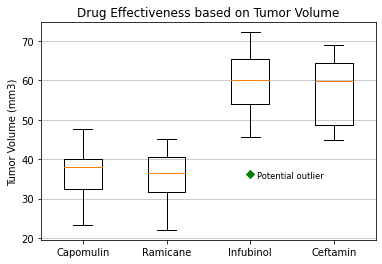

In [26]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
data_bxplot = [tumor_vol_data["Capomulin"],tumor_vol_data["Ramicane"],tumor_vol_data["Infubinol"],tumor_vol_data["Ceftamin"]]
# data_bxplot = [Capomulin, Ramicane, Infubinol,Ceftamin]
labels =["Capomulin","Ramicane","Infubinol","Ceftamin"]

fig1, ax1 = plt.subplots()
ax1.set_title('Drug Effectiveness based on Tumor Volume')
ax1.set_ylabel('Tumor Volume (mm3)')
ax1.boxplot(data_bxplot, 0, 'gD',labels=labels)
ax1.yaxis.grid(True, linestyle='-', which='major', color='gray',alpha=0.5)
fig1.text(0.625, 0.34, 'Potential outlier', color='black', weight='roman', size='small')
plt.show()

* Insight: Capomulin and Ramicane seem to be more effective at reducing the tumor size in comparison with Infubinol and Ceftamin.

## Line and Scatter Plots

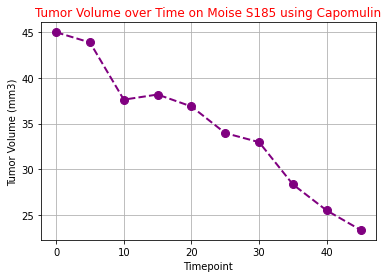

In [27]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin
Capomulin_s185_df = mouse_cleaned_df.loc[(mouse_cleaned_df["Drug Regimen"]== "Capomulin") & (mouse_cleaned_df["Mouse ID"]== "s185"),:]
Capomulin_s185_df
h_axis = Capomulin_s185_df["Timepoint"]
v_axis = Capomulin_s185_df["Tumor Volume (mm3)"]
plt.plot(h_axis,v_axis,color="purple", marker='o', linestyle='dashed', linewidth=2, markersize=8)
plt.xlabel("Timepoint")
plt.ylabel("Tumor Volume (mm3)")
plt.title("Tumor Volume over Time on Moise S185 using Capomulin", color="red")
plt.grid()

* Insight: there is a significant reduction in size overtime using Capomulin

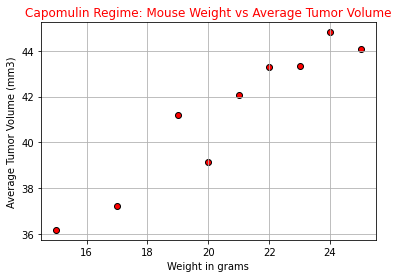

In [28]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen
Capomulin_Reg_df = mouse_cleaned_df.loc[(mouse_cleaned_df["Drug Regimen"]== "Capomulin"),:]
Capomulin_by_mouse_wgt = Capomulin_Reg_df.groupby(Capomulin_Reg_df["Weight (g)"])
ave_wgt_df = Capomulin_by_mouse_wgt.mean()
ave_wgt_df
# ave_wgt_df.index.get_level_values(0)
x = ave_wgt_df["Tumor Volume (mm3)"].index.get_level_values(0)
y = ave_wgt_df["Tumor Volume (mm3)"].tolist()
plt.scatter(x, y, marker="o", facecolors="red", edgecolors="black")
plt.xlabel("Weight in grams")
plt.ylabel("Average Tumor Volume (mm3)")
plt.title("Capomulin Regime: Mouse Weight vs Average Tumor Volume", color="red")
plt.grid()

## Correlation and Regression

The correlation between both factors is 0.95


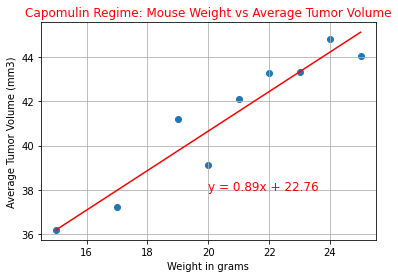

In [29]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
correlation = st.pearsonr(x,y)
print(f"The correlation between both factors is {round(correlation[0],2)}")

(slope, intercept, rvalue, pvalue, stderr) = linregress(x,y)
regress_values = x * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x,y)
plt.plot(x,regress_values,"r-")
plt.annotate(line_eq,(20,38),fontsize=12,color="r")
plt.xlabel("Weight in grams")
plt.ylabel("Average Tumor Volume (mm3)")
plt.title("Capomulin Regime: Mouse Weight vs Average Tumor Volume", color="red")
plt.grid()
plt.show()

* Insight: there is a strong direct correlation between the mouse weight and the average tumor volume on mouses used on the Capomulin regime.